In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text

In [2]:
# loading and converting all anatomical data

# reading the anatomy measurements from the *first* file
all_anatomy_LR1=pd.read_excel('.\Lippa_data.xlsx','Anatomy', index_col='ID')
all_anatomy_LR1=all_anatomy_LR1.drop(['Timestamp', 'Horse', 'Temperature'], axis=1)
# reading the anatomy measurements from the *second* file 
all_anatomy_LR2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Anatomy', index_col='ID')
all_anatomy_LR2=all_anatomy_LR2.drop(['Horse'], axis=1)
# reading the anatomy measurements from the *third* file 
all_anatomy_LR3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Anatomy', index_col='ID')
all_anatomy_LR3=all_anatomy_LR3.drop(['Horse'], axis=1)
# reading the anatomy measurements from *final* file 
all_anatomy_LR4=pd.read_excel('.\Lippa_data_final.xlsx','Anatomy', index_col='ID')
all_anatomy_LR4=all_anatomy_LR4.drop(['Horse'], axis=1)
# put them together and sort
all_anatomy_LR=pd.concat([all_anatomy_LR1, all_anatomy_LR2, all_anatomy_LR3, all_anatomy_LR4]).sort_index()
all_anatomy_LR['Sex']=all_anatomy_LR['Sex'].replace(['M','G','S'],['1','0','2'])

In [3]:
# loading and converting kinematic data
kinematics1=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all', index_col='ID')
kinematics2=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all_new25', index_col='ID')
kinematics3=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all_27ijs', index_col='ID')
kinematics4=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all_final', index_col='ID')
kinematics_all=pd.concat([kinematics1, kinematics2, kinematics3, kinematics4]).sort_index()

In [4]:
# loading and converting housing data
housing1=pd.read_excel('.\Lippa_data_24ijs.xlsx','Housing and work', index_col='ID')
housing1=housing1.drop(['Horse'], axis=1)
housing1['Work']=housing1['Work'].replace(['yes','no'],[1,0])

housing2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Housing and work', index_col='ID')
housing2=housing2.drop(['Horse'], axis=1)
housing2['Work']=housing2['Work'].replace(['yes','no'],[1,0])

housing3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Housing and work', index_col='ID')
housing3=housing3.drop(['Horse'], axis=1)
housing3['Work']=housing3['Work'].replace(['yes','no'],[1,0])

housing4=pd.read_excel('.\Lippa_data_final.xlsx','Housing and work', index_col='ID')
housing4=housing4.drop(['Horse'], axis=1)
housing4['Work']=housing4['Work'].replace(['yes','no'],[1,0])

housing=pd.concat([housing1, housing2, housing3, housing4]).sort_index()
type_of_work=housing['Type of work'].unique()
type_of_work
housing['Type of work']=housing['Type of work'].replace(list(type_of_work), [0, 1, 2, 3, 4]) #no=0, riding=1, in training=2, show=3, carriage=4

In [5]:
# loading and converting digital data
digital_measurment_of_head1=pd.read_excel('.\Additional data 24 horses.xlsx','Head anatomy', index_col='ID')
digital_measurment_of_head1=digital_measurment_of_head1.drop(['Horse'], axis=1)
digital_measurment_of_head2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Additional anatomy', index_col='ID')
digital_measurment_of_head2=digital_measurment_of_head2.drop(['Horse'], axis=1)
digital_measurment_of_head3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Additional anatomy', index_col='ID')
digital_measurment_of_head3=digital_measurment_of_head3.drop(['Horse'], axis=1)
digital_measurment_of_head4=pd.read_excel('.\Lippa_data_final.xlsx','Additional anatomy', index_col='ID')
digital_measurment_of_head4=digital_measurment_of_head4.drop(['Horse'], axis=1)

digital_measurment_of_head=pd.concat([digital_measurment_of_head1, digital_measurment_of_head2, digital_measurment_of_head3, digital_measurment_of_head4]).sort_index()

In [6]:
# loading and converting whorls data
whorls_of_head1=pd.read_excel('.\Additional data 24 horses.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head3=pd.read_excel('.\Lippa_data_27ijs.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head4=pd.read_excel('.\Lippa_data_final.xlsx','Whorls_for_code',index_col='ID' ) 
whorls_of_head=pd.concat([whorls_of_head1, whorls_of_head2, whorls_of_head3, whorls_of_head4]).sort_index()

In [7]:
# loading transformed fear data
fear_max_sum=pd.read_excel('.\Lippa_experiments.xlsx','Fear_max_sum101', index_col='ID')
fear_max_sum=fear_max_sum.sort_index()

Text(0, 0.5, 'Number of horses')

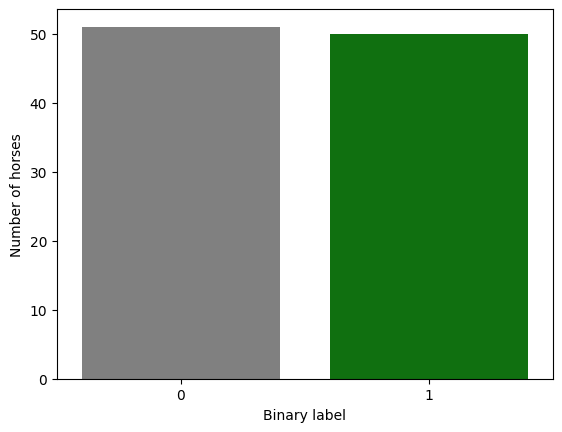

In [8]:
#target features = sum of first repetition (REACTIVITY analysis) of fear tests divided by two classes.
y=fear_max_sum['bin_sum_r1'] 
tt=fear_max_sum['bin_sum_r1'].value_counts()
plt.figure()
sns.barplot(x=tt.index, y=tt, palette=['grey', 'green']);
plt.xlabel("Binary label") 
plt.ylabel('Number of horses')

In [9]:
y=y.sort_index()
y.value_counts()

0    51
1    50
Name: bin_sum_r1, dtype: int64

In [10]:
X_initial=pd.concat([all_anatomy_LR, kinematics_all, housing, whorls_of_head, digital_measurment_of_head], axis=1).sort_index()

# the FIRST stage of the study - removing features that correlate with each other 

# empty_list=[]

# # LEFT+front measurements
# corr_list_left=["FH10L", "FH11L", "FH12L", "FH13L", "FH14L", 'FH15L',"FH16L", "FH17L", "FH18L", "FH19L", "FB08", "FB10L", "FB11L", "FB12L", "FB13L", \
#             "FB14L", "FB15L", "FB16L", "FB18L", "FB19L", "FB20L", "FB21L", "FB22L", "FB23L", "FB24L", "FB25L", "FB26L", "FB27L", "FB28L",\
#             "FB29L", "FB31L", "FB32L", "FB34L", "FB35L", "FB36L", "FB37L", "FB38", "FB39", "Trot_Stride lengh",\
#             "Whorl2_Rotation", "Whorl2_Height", "HMPF1", "HMPF2", "HMPF3", "HMPF4", "HMPF6", "HMPF9", "HMPF22", "HMPF23",  "HMPF25", "HMPF27", "HMPF31",\
#             "HMPF34", "HMPF35", "HMPF37", "HMPF39",  "HMPF41", "HMPF43", "HMPF45", "HMPF47", "HMPF49","HMPL2", "HMPL11", "HMPL12","HMPL15"]

# # RIGHT+front measurements
# corr_list_right=["FH10R","FH11R","FH12R","FH13R","FH14R","FH15R","FH16R","FH17R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB13R","FB14R",\
#             "FB15R","FB16R","FB18R","FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R",\
#             "FB32R","FB34R","FB35R","FB36R","FB37R","FB39","FB40","Trot_Speed","Whorl2_Height", 'Whorl2_Lateral location',"HMPF2","HMPF3","HMPF5","HMPF7",\
#             "HMPF10","HMPF24","HMPF20", "HMPF21","HMPF26","HMPF30","HMPF32","HMPF33","HMPF36","HMPF38","HMPF40","HMPF42","HMPF44","HMPF46","HMPF48","HMPF71",\
#             "HMPR12","HMPR13","HMPR17"]

# # LEFT + additianal right + front measurements
# corr_list_left_add=["FH10L", "FH11L", "FH12L", "FH13L", "FH14L", "FH15L","FH16L", "FH17L","FH18L", "FH19L", "FB08", "FB10L", "FB11L", "FB12L", "FB13L", \
#             "FB14L","FB15L", "FB16L", "FB18L", "FB19L", "FB20L", "FB21L", "FB22L", "FB23L", "FB24L", "FB25L", "FB26L", "FB27L", "FB28L",\
#             "FB29L", "FB31L", "FB32L", "FB34L", "FB35L", "FB36L", "FB37L", "FB38", "FB39", "Trot_Stride lengh",\
#             "Whorl2_Rotation", "Whorl2_Height", "HMPF1", "HMPF2", "HMPF3", "HMPF4", "HMPF6", "HMPF9", "HMPF22", "HMPF23", "HMPF25", "HMPF27", "HMPF31",\
#             "HMPF34", "HMPF35", "HMPF37", "HMPF39", "HMPF41", "HMPF43", "HMPF45", "HMPF47","HMPF49", "HMPL2", "HMPL11", "HMPL12","HMPL15",\
#             "HMPF24","HMPF32", "HMPF69", "HMPR2", "HMPR11", "HMPR12","HMPR15"] 

# # RIGHT + additianal left + front measurements
# corr_list_right_add=["FH10R","FH11R","FH12R","FH13R","FH14R","FH15R","FH16R","FH17R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB13R","FB14R",\
#             "FB15R","FB16R","FB18R","FB32R","FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R",\
#             "FB34R","FB35R","FB36R","FB37R","FB39","FB40","Trot_Speed","Whorl2_Height", 'Whorl2_Lateral location',"HMPF2","HMPF3","HMPF5","HMPF7",\
#             "HMPF10","HMPF24","HMPF20", "HMPF21","HMPF26","HMPF30","HMPF32","HMPF33","HMPF36","HMPF38","HMPF40","HMPF42","HMPF44","HMPF46","HMPF48","HMPF71",\
#             "HMPR13","HMPR12","HMPR17", "FB32L", "HMPF27", "HMPF35",  "HMPL12", "HMPL13", "HMPL17"]    


# #left column of corr matrix
# corr_list_feature1=["FH10L","FH11L","FH12L","FH13L","FH14L","FH15L","FH16L","FH17L", "FH18L","FH19L","FB08","FB10L","FB11L","FB12L","FB13L","FB14L","FB15L","FB16L","FB18L",\
#            "FB19L","FB20L","FB21L","FB22L","FB23L","FB24L","FB25L","FB26L","FB27L","FB28L","FB29L","FB31L","FB32L","FB34L","FB35L","FB36L",\
#            "FB37L","FB38","FB39","Trot_Stride lengh","Whorl2_Rotation", "Whorl2_Height","HMPF1","HMPF2","HMPF3","HMPF4","HMPF6","HMPF9","HMPF20","HMPF21",\
#            "HMPF24", "HMPF25","HMPF26", "HMPF30", "HMPF32", "HMPF33", "HMPF34", "HMPF36", "HMPF38", "HMPF40", "HMPF42", "HMPF44", "HMPF46", "HMPF48","HMPF69",\
#            "HMPL2", "HMPL11", "HMPL12", "HMPL15", "HMPR2", "HMPR11", "HMPR12", "HMPR15"]

# #right column of corr matrix
# corr_list_feature2=["FH10R","FH11R","FH12R","FH13R","FH14R","FH15R","FH16R","FH17R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB13R","FB14R","FB15R",\
#         "FB16R","FB18R",'FB32L',"FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R","FB32R","FB34R","FB35R",\
#         "FB36R","FB37R","FB39","FB40","Trot_Speed","Whorl2_Height", 'Whorl2_Lateral location',"HMPF2","HMPF3","HMPF5","HMPF7", "HMPF10","HMPF24","HMPF25","HMPF22","HMPF23",\
#         "HMPF26", "HMPF27","HMPF31", "HMPF33", "HMPF34","HMPF38","HMPF35","HMPF37","HMPF39","HMPF41","HMPF43","HMPF45","HMPF47","HMPF49",\
#         "HMPF71","HMPL13","HMPL12","HMPL17","HMPR13","HMPR12","HMPR17"]

# the SECOND stage of the study - using only important features defined during previous steps

# iteration № 1
iteration_1=['Age', 'HMPF20', 'HMPF34', 'HMPL10', 'HMPF48', 'FB02', 'HMPF12', 'HMPF28', 'HMPF16', 'HMPL2', 'FB24L', 'FB25L', 'HMPF45', 'HMPF17', 'HMPF69', 'Trot_DV power',
 'HMPR11', 'HMPF22', 'FB36R', 'HMPR1', 'HMPF14', 'HMPL9', 'HMPF47', 'HMPR15', 'HMPF9', 'FB07', 'HMPF31', 'Type of work', 'FH01', 'HMPR16', 'HMPF7', 'HMPF70', 'FH14L', 'FB27L',
 'Trot_Simmetry', 'HMPL1', 'FB19L', 'HMPF64', 'Trot_Regularity', 'FB17L', 'FH18L', 'HMPF62', 'HMPR7', 'HMPF10', 'HMPF15', 'HMPF29', 'FB24R', 'HMPF60', 'Number of boxes', 'HMPR4',
 'HMPF61', 'HMPR9', 'HMPL12', 'Walk_Cadence', 'HMPL5', 'HMPF18', 'FB04', 'FB38', 'HMPL17', 'FB17R', 'Trot_Stride lengh', 'HMPF37', 'HMPF68']

# iteration № 2
iteration_2=['Age','HMPL9','FB02','HMPL10','HMPF16','HMPF47','HMPL2','HMPF61','HMPF15','HMPF34','FB24R','HMPL1','HMPL17','HMPR15','Trot_DV power','HMPR9','FB24L','HMPF9','HMPL5',
'HMPF28','HMPR1','HMPF31','FB27L']

# iteration № 3
final_iteration=["Age", "Trot_DV power", "HMPF16", "HMPR15", "FB24L", "HMPL2", "HMPR1", "HMPL5", "HMPL1", "HMPF9", "HMPR9", "HMPL9", "HMPF34", "HMPL10", "FB02", "HMPF47"]

# using of important features identified by DT models with an accuracy > 0.8 determined at the first stage of the study (the above iterations were used sequentially)
remove_bad_features = [item for item in X_initial.columns if item not in final_iteration] #final iteration

In [ ]:
rs_list=list(range(1, 150001)) #35000
# 1 stage:             
# full_corr_list=[empty_list, corr_list_left, corr_list_right, corr_list_left_add, corr_list_right_add, corr_list_feature1, corr_list_feature2]

# 2 stage
full_corr_list=[remove_bad_features]

def split_by_hand(Features,goal,number):
    y_test=goal[[number]] #chose a value from y
    X_test=Features.iloc[[number]] #chose a value from X
    y_train=np.delete(np.array(goal),(number)) #remove test_instance from the set
    X_train=Features.drop(Features.index[number]) #remove test_instance from the set
    return X_train, X_test, y_train, y_test

max_acc=0
number_of_horses=len(X_initial)

#loop through different lists of features
for corr_list in full_corr_list:
    X=X_initial.drop(corr_list, axis=1)
    print(len(X.columns))
    max_acc=0
    min_acc=1
    
    #loop by parameters random_state
    for rs in rs_list:
        accuracy_list=[]
        prediction=[]
        selection_features=pd.DataFrame()
        
        #LOO CV loop
        for test_instance in range(number_of_horses):

            X_train, X_test, y_train, y_test=split_by_hand(X,y,test_instance)
            
            DT_model=tree.DecisionTreeClassifier(criterion='gini', random_state=rs, max_features='sqrt') 
            
            DT_model.fit(X_train,y_train) 
        
            y_predict=DT_model.predict(X_test) 
        
            prediction.append([y_test[0], y_predict[0]])
            if (y_predict[0]==y_test[0]):
                accuracy_list.append(1)
            
            feats=pd.DataFrame(index=X.columns, data=DT_model.feature_importances_, columns=['Important'])
            selection_features=pd.concat([selection_features, feats])
        
        if sum(accuracy_list)/number_of_horses>max_acc:
            max_acc=sum(accuracy_list)/number_of_horses
            random_st=rs
        print('Random_state=', rs, "Accuracy=", sum(accuracy_list)/number_of_horses, 'set=', len(X.columns), file=open('first_rep_DT101_for_the_best.txt', 'a')) 
    print('+++++ Random_state=', random_st, "MAX Accuracy=",max_acc,  'set=', len(X.columns), file=open('first_rep_DT101_for_the_best.txt', 'a')) 

In [ ]:
# accuracy for the defined best random_state parameter
print("Accuracy=", max_acc, 'Random state=', random_st)

<Axes: >

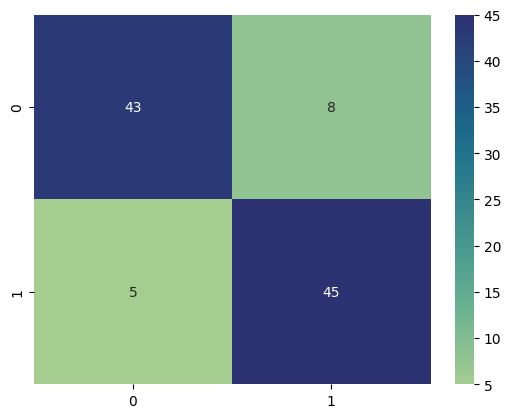

In [13]:
# confusion_matrix for the defined best random_state parameter
prediction=np.array(prediction)
sns.heatmap(confusion_matrix(prediction[:,0], prediction[:,1]), annot=True,cmap="crest")

In [14]:
# precision and recall for the defined best random_state parameter
compare_matrix=confusion_matrix(prediction[:,0], prediction[:,1])
print(compare_matrix)                                        
precision=compare_matrix[1][1]/(compare_matrix[1][1]+compare_matrix[0][1])
print('Precision=', precision)
recall=compare_matrix[1][1]/(compare_matrix[1][1]+compare_matrix[1][0])
print('Recall=', recall)

[[43  8]
 [ 5 45]]
Precision= 0.8490566037735849
Recall= 0.9


In [15]:
selection_features[selection_features['Important']!=0].sort_values('Important')

,Important
HMPF9,0.020000
HMPF9,0.020000
HMPF9,0.020000
HMPF9,0.020000
HMPF9,0.020000
...,...
HMPF34,0.281119
HMPF34,0.283101
HMPF34,0.287121
HMPF34,0.288788


Age              101
FB02             101
HMPF16           101
HMPF34           101
HMPL10           101
HMPL5            101
HMPR15           101
HMPL2             99
FB24L             98
HMPR1             97
HMPF9             96
HMPL1              4
Trot_DV power      3
dtype: int64


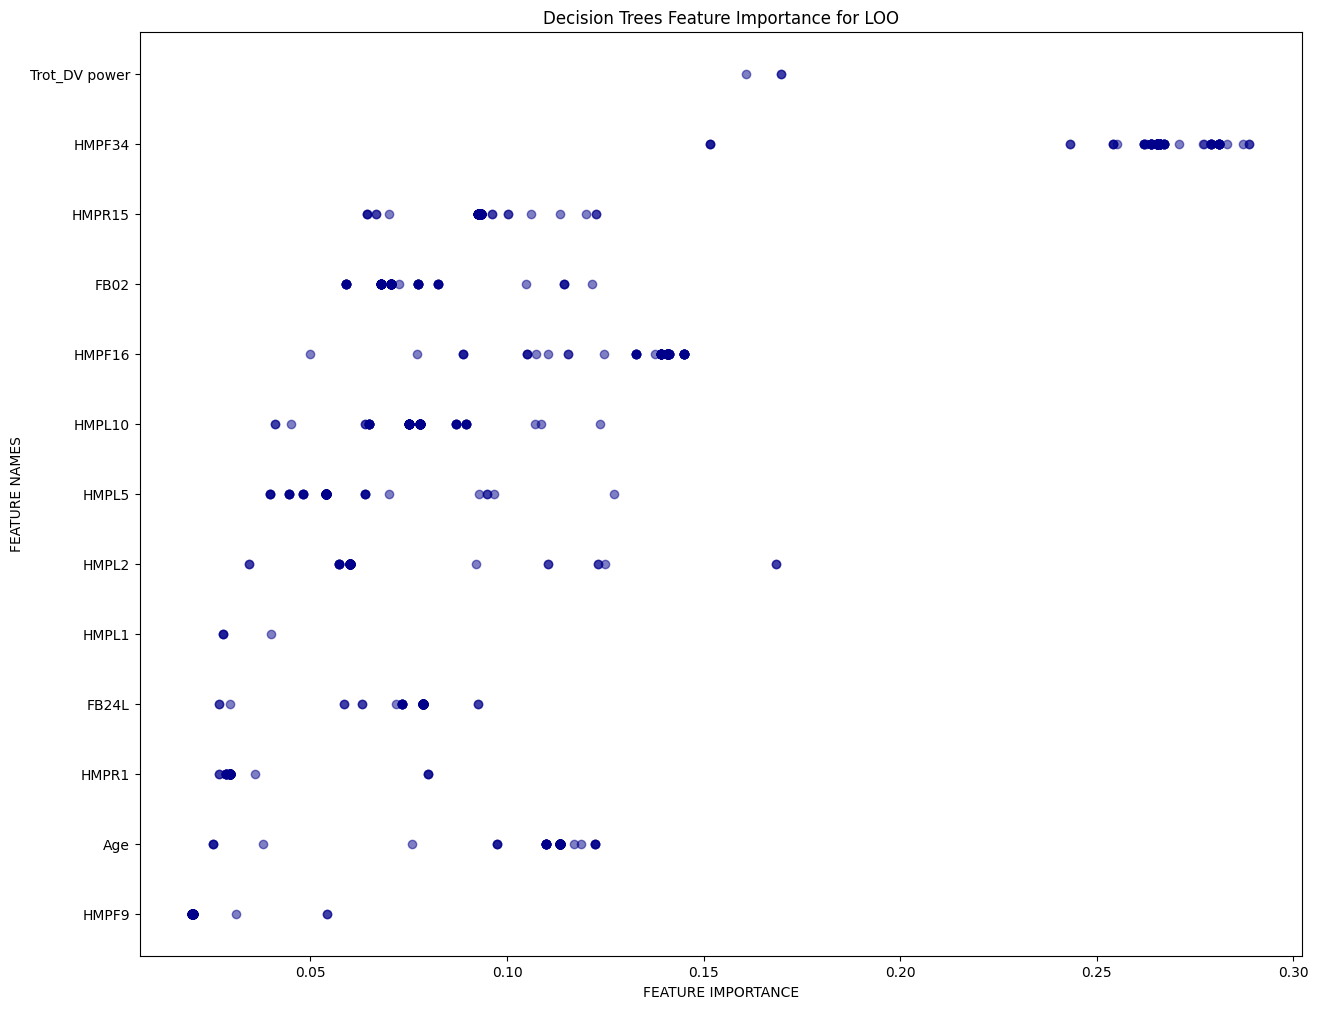

In [16]:

forplot=selection_features[selection_features['Important']!=0].sort_values(['Important'], axis=False)

sf_list=list(forplot.index)
tt=[i for i in sf_list if sf_list.count(i)<0]
unique=list(set(tt))
for i in unique:
    forplot=forplot.drop(i, axis=0)
print(forplot.value_counts(forplot.index))
plt.figure(figsize=(15,12))
plt.scatter(x=forplot['Important'], y=forplot.index, color='darkblue', alpha=0.5)
plt.title('Decision Trees ' + 'Feature Importance for LOO')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');



In [17]:
# Modeling on the full dataset
X=X_initial.drop(remove_bad_features, axis=1)
DTall_model=DecisionTreeClassifier(criterion='gini',  max_features='sqrt', random_state=44150) #use the best random_state

DTall_model.fit(X,y)
feats_=pd.DataFrame(index=X.columns, data=DTall_model.feature_importances_, columns=['Important'])
feats_[feats_['Important']>0].sort_values('Important', ascending=False)


,Important
HMPF34,0.268858
HMPF16,0.139667
Age,0.112407
HMPR15,0.092540
FB24L,0.077775
HMPL10,0.077060
FB02,0.069840
HMPL2,0.059412
HMPL5,0.053471
HMPR1,0.029166


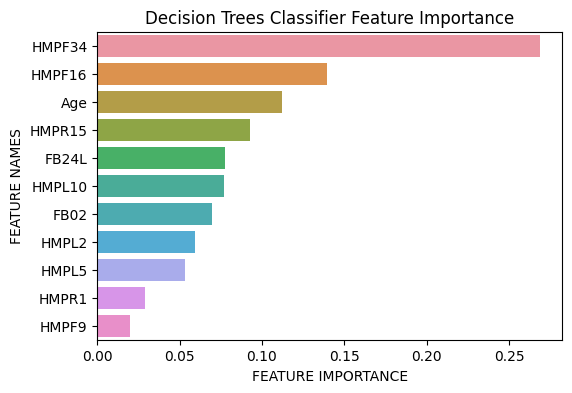

In [18]:
feats_for_plot=feats_[feats_['Important']>0].sort_values('Important', ascending=False)
plt.figure(figsize=(6,4))
#Plot Searborn bar chart
sns.barplot(x=feats_for_plot['Important'], y=feats_for_plot.index)
#Add chart labels
plt.title('Decision Trees Classifier ' + 'Feature Importance')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

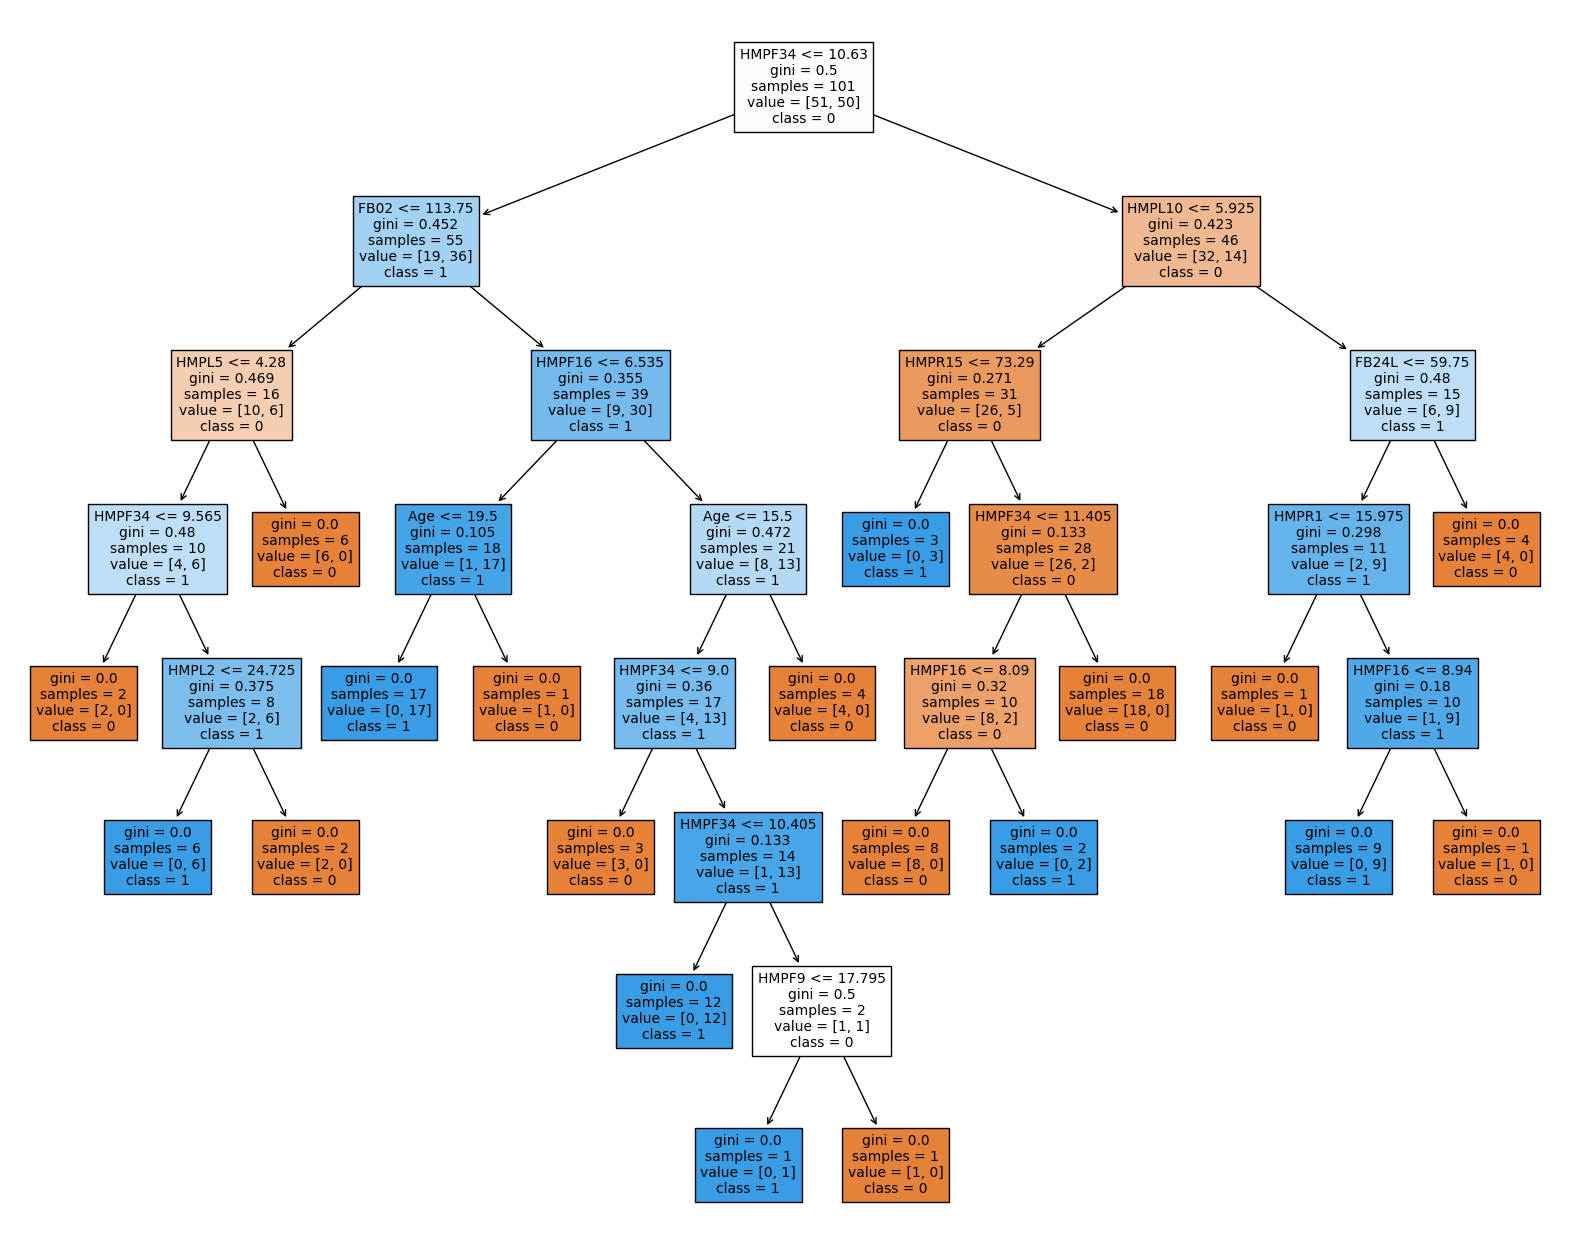

In [19]:
fig = plt.figure(figsize=(20,16))
_ = tree.plot_tree(DTall_model, feature_names=feats_.index, class_names='01', filled=True)

In [20]:
tree_text = export_text(DTall_model, feature_names=list(X.columns))
print(tree_text)

|--- HMPF34 <= 10.63
|   |--- FB02 <= 113.75
|   |   |--- HMPL5 <= 4.28
|   |   |   |--- HMPF34 <= 9.57
|   |   |   |   |--- class: 0
|   |   |   |--- HMPF34 >  9.57
|   |   |   |   |--- HMPL2 <= 24.73
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- HMPL2 >  24.73
|   |   |   |   |   |--- class: 0
|   |   |--- HMPL5 >  4.28
|   |   |   |--- class: 0
|   |--- FB02 >  113.75
|   |   |--- HMPF16 <= 6.54
|   |   |   |--- Age <= 19.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  19.50
|   |   |   |   |--- class: 0
|   |   |--- HMPF16 >  6.54
|   |   |   |--- Age <= 15.50
|   |   |   |   |--- HMPF34 <= 9.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- HMPF34 >  9.00
|   |   |   |   |   |--- HMPF34 <= 10.41
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- HMPF34 >  10.41
|   |   |   |   |   |   |--- HMPF9 <= 17.80
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- HMPF9 >  17.80
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |